In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.image import imread
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation,Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
pip install gtts

In [ ]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class

In [ ]:
pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 29.5 MB/s eta 0:00:00


In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [ ]:
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Model**

In [ ]:
cnn= tf.keras.models.load_model('/content/Pilot_model.h5')

Performing Prediction on single image

([], [])

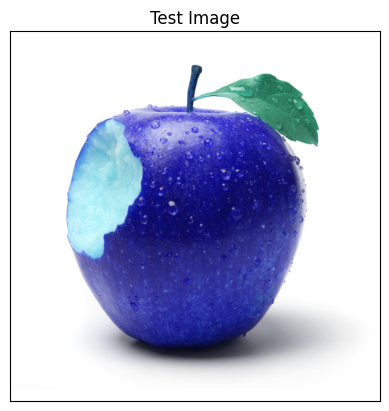

In [ ]:
import cv2
image_path='/content/drive/MyDrive/Pilot_Data/test/apple/Image_1.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

**Testing Model**

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_array=tf.keras.preprocessing.image.img_to_array(image) #Convert image to array
input_arr= np.array([input_array]) #Converting single image bath input array to numpy array of 2 dimension
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 289ms/step


In [ ]:
print(predictions) #Each class confidence score

[[1.0000000e+00 8.3619279e-35 1.8805289e-16 9.2557846e-18 0.0000000e+00
  5.5434715e-09 1.3381114e-16 5.8059108e-38 2.3644336e-15 5.1988618e-33
  0.0000000e+00 5.6162934e-26 4.5939645e-35 2.5014108e-30 2.7927092e-22
  1.3679598e-22 1.6065439e-33 0.0000000e+00 6.9077911e-33 4.3653482e-22
  1.1474228e-18 1.0015571e-16 7.2240947e-09 1.4602575e-22 6.0877121e-34
  2.8822637e-20 1.2564690e-12 8.8262368e-26 4.7408440e-19 0.0000000e+00
  5.2424763e-33 1.3954747e-34 2.5184688e-18 8.5962021e-13 1.0144737e-15
  5.1667914e-19]]


In [ ]:
test_set= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Pilot_Data/test',labels='inferred',label_mode='categorical',class_names=None,color_mode='rgb',batch_size=32,image_size=(64,64),shuffle=True,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,crop_to_aspect_ratio=False)

Found 359 files belonging to 36 classes.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

0


Display Image

([], [])

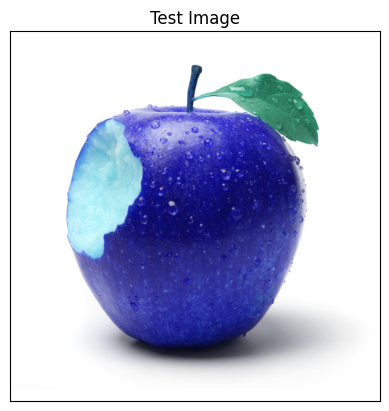

In [ ]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

Single Prediction

In [ ]:

gg= "It's an {}".format(test_set.class_names[result_index[0][0]])
tts = gTTS(gg) #Provide the string to convert to speech


tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
Audio(sound_file, autoplay=True)

In [ ]:
%%time
response = model.generate_content("Tell me in 150 words about {}".format(gg))

CPU times: user 82.3 ms, sys: 9.38 ms, total: 91.7 ms
Wall time: 5.43 s


In [ ]:
to_markdown(response.text)

> In the vibrant realm of nature, where colors dance and scents intertwine, there exists a humble yet extraordinary fruit: the apple. Its smooth, rounded form, painted in a myriad of hues from crimson to emerald, invites the gaze. Beneath its glossy skin, a crisp and succulent flesh awaits, bursting with a symphony of flavors.
> 
> Sweetness dances upon the palate, mingling with a hint of tartness that awakens the senses. Each bite releases a burst of vitamins and minerals, nourishing the body and revitalizing the spirit. From the crisp morning air to the fading light of dusk, the apple stands as a testament to the beauty and bounty of nature's offerings.

In [ ]:
ttss=gTTS(response.text)
ttss.save('A.wav') #save the string converted to speech as a .wav file
sound_file = 'A.wav'
Audio(sound_file, autoplay=True)

([], [])

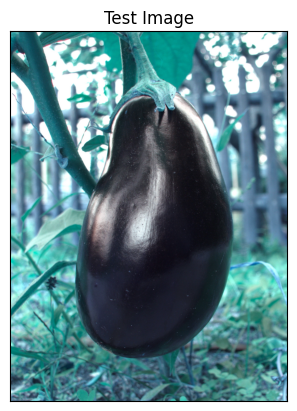

In [ ]:
image_path1='/content/drive/MyDrive/Pilot_Data/test/eggplant/Image_1.jpg'
img1=cv2.imread(image_path1)
plt.imshow(img1)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

In [ ]:
image1 = tf.keras.preprocessing.image.load_img(image_path1,target_size=(64,64))
input_array1=tf.keras.preprocessing.image.img_to_array(image1) #Convert image to array
input_arr1= np.array([input_array1]) #Converting single image bath input array to numpy array of 2 dimension
predictions = cnn.predict(input_arr1)
print(predictions)

1/1 [==============================] - 0s 39ms/step
[[0.0000000e+00 0.0000000e+00 5.6718353e-28 1.4640301e-34 0.0000000e+00
  1.3388375e-37 0.0000000e+00 0.0000000e+00 6.0453889e-33 1.4323093e-36
  2.5860207e-35 1.0000000e+00 3.0903613e-23 5.2674696e-27 6.0466649e-23
  5.8272858e-28 4.3867407e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.1397655e-25 0.0000000e+00 0.0000000e+00 2.2665507e-32 2.6010814e-33
  1.1539625e-34 1.0262043e-31 2.0491201e-31 1.7013281e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.7225280e-32 0.0000000e+00 1.4659519e-20
  2.2769499e-32]]


In [ ]:
result_index1 = np.where(predictions[0] == max(predictions[0]))
print(result_index1[0][0])

11


In [ ]:
print("It's an {}".format(test_set.class_names[result_index1[0][0]]))
kk= "It's an {}".format(test_set.class_names[result_index1[0][0]])
tts = gTTS(kk) #Provide the string to convert to speech


tts.save('2.wav') #save the string converted to speech as a .wav file
sound_file = '2.wav'
Audio(sound_file, autoplay=True)

It's an eggplant


In [ ]:
%%time
response1 = model.generate_content("Tell me in 150 words about {}".format(kk))

CPU times: user 77.4 ms, sys: 14 ms, total: 91.4 ms
Wall time: 5.35 s


In [ ]:
to_markdown(response1.text)

> In the heart of a vibrant garden, nestled amidst lush foliage, there existed an enigmatic eggplant, its elongated shape and glossy purple skin capturing the attention of all who passed by. Its smooth surface was as soft as velvet, inviting gentle caresses.
> 
> Beneath its unassuming exterior lay a symphony of flavors. The flesh, when sliced, revealed a creamy white interior, its texture tender and slightly spongy. Its earthy taste was balanced by a hint of sweetness, creating a harmonious dance on the palate.
> 
> Whether grilled, roasted, or fried, the eggplant transformed into a culinary masterpiece. Its versatility allowed it to blend seamlessly with other ingredients, its subtle presence enhancing the overall flavor profile of dishes.
> 
> Beyond its culinary prowess, the eggplant also possessed a rich symbolism. In some cultures, it represented longevity and prosperity, while in others, it was associated with wisdom and knowledge.
> 
> As the sun began to set, casting long shadows across the garden, the eggplant stood tall, its presence a testament to the abundance and beauty of nature.

In [ ]:
ttss=gTTS(response1.text)
ttss.save('B.wav') #save the string converted to speech as a .wav file
sound_file = 'B.wav'
Audio(sound_file, autoplay=True)

1/1 [==============================] - 0s 32ms/step


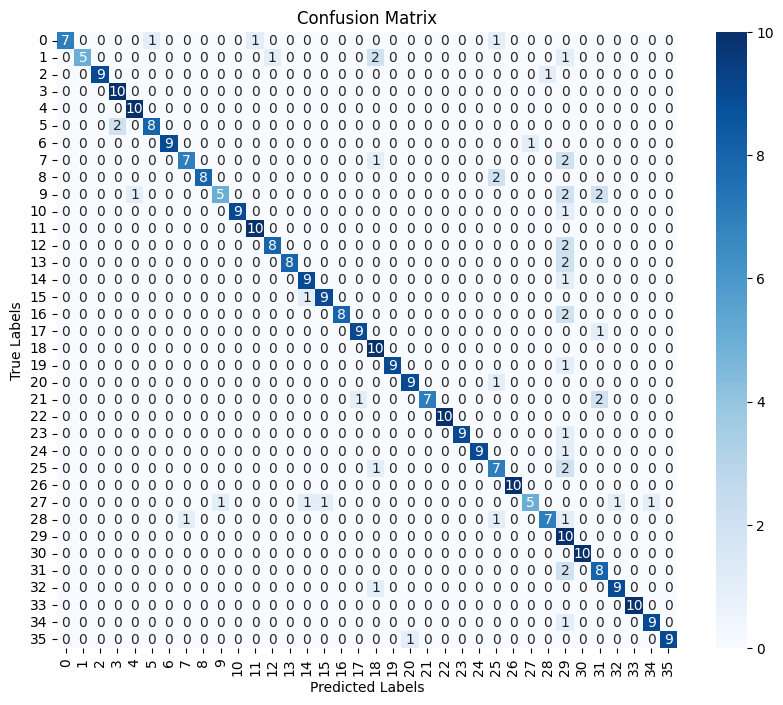

In [ ]:
# Get true labels and predicted labels for the test set
true_labels = []
predicted_labels = []

for images, labels in test_set:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
    predictions = cnn.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_set.class_names)

# Display the classification report
print(class_report)


               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.56      0.71         9
     beetroot       1.00      0.90      0.95        10
  bell pepper       0.83      1.00      0.91        10
      cabbage       0.91      1.00      0.95        10
     capsicum       0.89      0.80      0.84        10
       carrot       1.00      0.90      0.95        10
  cauliflower       0.88      0.70      0.78        10
chilli pepper       1.00      0.80      0.89        10
         corn       0.83      0.50      0.62        10
     cucumber       1.00      0.90      0.95        10
     eggplant       0.91      1.00      0.95        10
       garlic       0.89      0.80      0.84        10
       ginger       1.00      0.80      0.89        10
       grapes       0.82      0.90      0.86        10
     jalepeno       0.90      0.90      0.90        10
         kiwi       1.00      0.80      0.89        10
        l

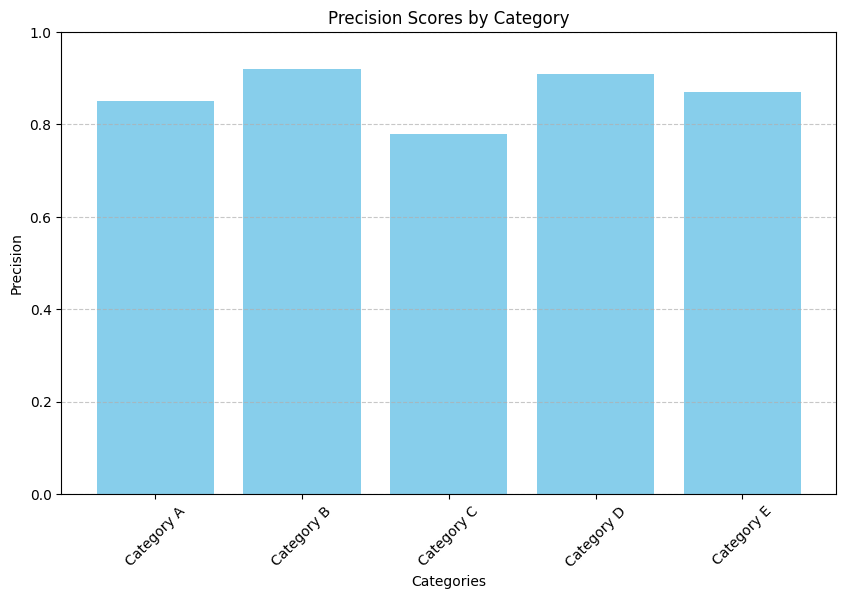